In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cifar

In [7]:
IMAGE_DATA, LABEL_DATA, LABEL_NAMES = cifar.load_dataset()

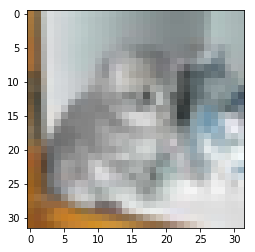

In [8]:
sample_cat = IMAGE_DATA[LABEL_DATA == 3][5]
plt.imshow(sample_cat)

In [9]:
import tensorflow as tf

In [31]:
IMAGE_SIZE = 32
IMAGE_CHANNELS = 3
BATCH_SIZE = 64
LEARNING_RATE = 0.001

#image_batch, label_batch = tf.train.batch([IMAGE_DATA, LABEL_DATA], batch_size=BATCH_SIZE, enqueue_many=True)

image_batch = tf.placeholder(dtype=tf.float32, shape=[BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS])
label_batch = tf.placeholder(dtype=tf.int32, shape=[BATCH_SIZE])
conv1 = tf.layers.conv2d(image_batch, filters=16, kernel_size=3, padding='same', activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, pool_size=2, strides=[1, 1], padding='same')

conv2 = tf.layers.conv2d(pool1, filters=32, kernel_size=3, padding='same', activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, pool_size=2, strides=[1, 1], padding='same')

conv3 = tf.layers.conv2d(pool2, filters=64, kernel_size=3, padding='same', activation=tf.nn.relu)
pool3 = tf.layers.max_pooling2d(conv3, pool_size=2, strides=[1, 1], padding='same')

fc = tf.layers.dense(tf.reshape(pool3, [BATCH_SIZE, -1]), units=100, activation=tf.nn.relu)
loss = tf.losses.sparse_softmax_cross_entropy(label_batch, fc)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss)

In [33]:
EPOCHS = 200
session = tf.Session()
session.run(tf.global_variables_initializer())
loss_values = []
for epoch in range(EPOCHS):
    indices = np.random.permutation(len(IMAGE_DATA))[:BATCH_SIZE]
    _, cur_loss = session.run([train_op, loss], feed_dict={image_batch: IMAGE_DATA[indices], label_batch: LABEL_DATA[indices]})
    loss_values.append(cur_loss)
    if epoch % 20 == 0:
        print("Epoch #{}/{} : loss = {:.4f}".format(epoch, EPOCHS, cur_loss))

Epoch #0/200 : loss = 4.6257
Epoch #20/200 : loss = 3.8181
Epoch #40/200 : loss = 3.4083
Epoch #60/200 : loss = 3.2299
Epoch #80/200 : loss = 3.3728
Epoch #100/200 : loss = 3.4951
Epoch #120/200 : loss = 3.3986
Epoch #140/200 : loss = 3.4456
Epoch #160/200 : loss = 3.0646
Epoch #180/200 : loss = 3.3745


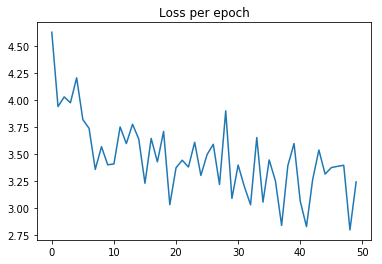

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_values) // 4), loss_values[::4])
_ = plt.title("Loss per epoch")